In [1]:
from sklearn.datasets import load_digits 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import random
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.graph_objects as go


In [3]:
digits = load_digits(return_X_y =True)
X=digits[0] 
y=digits[1] 
#X=X/255

In [4]:
len(y)

1797

In [5]:
len(X)

1797

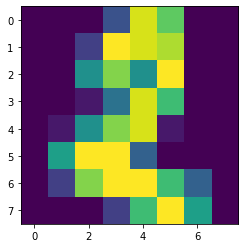

In [6]:
plt.imshow(X[2,:].reshape(8,8))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# **CNN**

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train=X_train.reshape((X_train.shape[0],8,8,1))
X_test=X_test.reshape((X_test.shape[0],8,8,1))

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV 


In [ ]:
Hayperparameters=[{'model_choice':['model1'],'lrt':[0.001,0.005,0.01,0.02],'n_filters':[16,32,64,128],'n_units':[32,64,128,256], 
                   'stride':[1,2],'filter_size':[2,3,5],'a_function':['elu','relu'],'drop_out':[False,True],
                   'pool':[False,True],'epochs':[10,30,50],'batch_size':[50,100,120]},
                  {'model_choice':['model2'],'lrt':[0.001,0.01,0.02],'n_filters':[16,32,64,128],'n_units':[32,64,128,256], 
                   'stride':[(1,1),(2,2)],'filter_size':[(3,4),(3,5)],'a_function':['elu','relu'],'drop_out':[False,True],
                   'pool':[False,True],'epochs':[10,40],'batch_size':[30,50,70]}]

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
def bl_model(model_choice,lrt,n_filters,n_units,stride,filter_size,a_function,drop_out,pool):
  model=keras.models.Sequential()
  if model_choice=='model1' and pool==False and drop_out==True:
    model.add(keras.layers.Conv2D(filters=n_filters,kernel_size=filter_size,strides=stride,activation=a_function,input_shape=(8,8,1)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(n_units,activation=a_function))
  if model_choice=='model1' and pool==True and drop_out==True:
    model.add(keras.layers.Conv2D(filters=n_filters,kernel_size=filter_size,strides=stride,activation=a_function,input_shape=(8,8,1),padding='same'))
    model.add(keras.layers.Maxpool2D(pool_size=2,strides=2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(n_units,activation=a_function))
  if model_choice=='model1' and pool==True and drop_out==False:
    model.add(keras.layers.Conv2D(filters=n_filters,kernel_size=filter_size,strides=stride,activation=a_function,input_shape=(8,8,1),padding='same'))
    model.add(keras.layers.Maxpool2D(pool_size=2,strides=2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_units,activation=a_function)) 
  if model_choice=='model1' and pool==False and drop_out==False:
    model.add(keras.layers.Conv2D(filters=n_filters,kernel_size=filter_size,strides=stride,activation=a_function,input_shape=(8,8,1)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_units,activation=a_function))
  if model_choice=='model2' and pool==True and drop_out==True:
    model.add(keras.layers.Conv2D(filters=n_filters[0],kernel_size=filter_size[0],strides=stride[0],activation=a_function[0],input_shape=(8,8,1),padding='same'))
    model.add(keras.layers.Dropout(0.5))
    for i in range(1,len(n_filters)):
     model.add(keras.layers.Conv2D(filters=n_filters[i],kernel_size=filter_size[i],strides=stride[i],activation=a_function[i]))
    model.add(keras.layers.Maxpool2D(pool_size=2,strides=2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_units,activation=a_function[i]))
  if model_choice=='model2' and pool==False and drop_out==True:
    model.add(keras.layers.Conv2D(filters=n_filters[0],kernel_size=filter_size[0],strides=stride[0],activation=a_function[0],input_shape=(8,8,1),padding='same'))
    model.add(keras.layers.Dropout(0.5))
    for i in range(1,len(n_filters)):
     model.add(keras.layers.Conv2D(filters=n_filters[i],kernel_size=filter_size[i],strides=stride[i],activation=a_function[i]))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_units,activation=a_function[i]))
  if model_choice=='model2' and pool==True and drop_out==False:
    model.add(keras.layers.Conv2D(filters=n_filters[0],kernel_size=filter_size[0],strides=stride[0],activation=a_function[0],input_shape=(8,8,1),padding='same'))
    for i in range(1,len(n_filters)):
     model.add(keras.layers.Conv2D(filters=n_filters[i],kernel_size=filter_size[i],strides=stride[i],activation=a_function[i]))
    model.add(keras.layers.Maxpool2D(pool_size=2,strides=2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_units,activation=a_function[i]))
  if model_choice=='model2' and pool==True and drop_out==False:
    model.add(keras.layers.Conv2D(filters=n_filters[0],kernel_size=filter_size[0],strides=stride[0],activation=a_function[0],input_shape=(8,8,1),padding='same'))
    for i in range(1,len(n_filters)):
     model.add(keras.layers.Conv2D(filters=n_filters[i],kernel_size=filter_size[i],strides=stride[i],activation=a_function[i]))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_units,activation=a_function[i]))
  model.add(keras.layers.Dense(10,activation='softmax'))
  model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=lrt),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return (model)

  
cnn_fm=KerasClassifier(bl_model)
cnn=RandomizedSearchCV(cnn_fm,param_distributions=Hayperparameters, n_iter=10,scoring='accuracy',cv=5)

In [ ]:
X_test=np.array(X_test)
X_test=X_test/255
y_test=np.array(y_test)

In [ ]:
h=cnn.fit( X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'int' object is not subscriptable


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: module 'tensorflow.keras.layers' has no attribute 'Maxpool2D'




Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 2.2955 - accuracy: 0.1819
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 2.2837 - accuracy: 0.2533
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 2.2721 - accuracy: 0.3246
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 2.2603 - accuracy: 0.4343
Epoch 5/10
39/39 [==============================] - 0s 3ms/step - loss: 2.2489 - accuracy: 0.5901
Epoch 6/10
39/39 [==============================] - 0s 3ms/step - loss: 2.2371 - accuracy: 0.6771
Epoch 7/10
39/39 [==============================] - 0s 3ms/step - loss: 2.2257 - accuracy: 0.7119
Epoch 8/10
39/39 [==============================] - 0s 3ms/step - loss: 2.2143 - accuracy: 0.7563
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 2.2030 - accuracy: 0.7850
Epoch 10/10
39/39 [==============================] - 0s 3ms/step - loss: 2.1917 - accuracy: 0.7894
Epoch 1/10
39/39 [=

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distri

Epoch 1/50
Epoch 1/50


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distri

Epoch 1/50
Epoch 1/50


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distri

Epoch 1/30
Epoch 1/30


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distri

Epoch 1/30
Epoch 1/30


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distri

Epoch 1/30
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distri

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distri

Epoch 1/10
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distri

Epoch 1/50
Epoch 1/50


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distri

Epoch 1/50
Epoch 1/50


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distri

Epoch 1/50
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distri

48/48 [==============================] - 0s 1ms/step - loss: 2.2883 - accuracy: 0.2136
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 2.2731 - accuracy: 0.4071
Epoch 3/10
48/48 [==============================] - 0s 2ms/step - loss: 2.2580 - accuracy: 0.5685
Epoch 4/10
48/48 [==============================] - 0s 1ms/step - loss: 2.2433 - accuracy: 0.6228
Epoch 5/10
48/48 [==============================] - 0s 2ms/step - loss: 2.2288 - accuracy: 0.6778
Epoch 6/10
48/48 [==============================] - 0s 2ms/step - loss: 2.2142 - accuracy: 0.7314
Epoch 7/10
48/48 [==============================] - 0s 1ms/step - loss: 2.1999 - accuracy: 0.7794
Epoch 8/10
48/48 [==============================] - 0s 2ms/step - loss: 2.1858 - accuracy: 0.8003
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 2.1717 - accuracy: 0.8045
Epoch 10/10
48/48 [==============================] - 0s 2ms/step - loss: 2.1578 - accuracy: 0.8017


In [ ]:
cnn.best_params_

{'a_function': 'elu',
 'batch_size': 30,
 'drop_out': False,
 'epochs': 10,
 'filter_size': (3, 4),
 'lrt': 0.001,
 'model_choice': 'model2',
 'n_filters': 64,
 'n_units': 128,
 'pool': False,
 'stride': (1, 1)}

In [ ]:
#cnn.best_estimator_.fit(X_train, y_train) 
acc=cnn.score(X_test,y_test)

In [ ]:
print('Accuracy is: %0.2f'% acc)

Accuracy is: 0.97


In [ ]:
y_pred=cnn.predict(X_test)
print('CNN','\n',confusion_matrix(y_test,y_pred))